Assignment #3 neural network
mojtaba aprouz - 40030594

In [1]:
import splitfolders
import os
import numpy as np
import cv2
from tensorflow import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

PART **1** 

In [3]:
splitfolders.ratio("images_small",output="ds",seed=1337,ratio=(0.8,0.1,0.1), group_prefix=None, move=False)

Copying files: 5652 files [02:55, 32.25 files/s]


In [2]:
base_dir, _ = os.path.splitext('ds')

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')
batch_size=20
image_size = 224

datagen = ImageDataGenerator(rescale=1./255)

PART **2** 

In [14]:

def feature_extract(dir,no_samples):
    features=np.zeros(shape=(no_samples,7,7,1024))
    labels=np.zeros((no_samples,50))
    generator=datagen.flow_from_directory(
        dir,
        target_size=(image_size,image_size),
        batch_size=batch_size,
        class_mode='categorical')
    i=0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size : (i+1)*batch_size]= features_batch
        labels[i*batch_size : (i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>= no_samples:
            break
    return features,labels



PART **3** 

In [8]:
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

In [15]:
train_features , train_labels= feature_extract(train_dir,4500)

Found 4500 images belonging to 50 classes.
1/1 [==============================] - 1s 1s/step


In [17]:
test_features , test_labels= feature_extract(test_dir,612)

Found 612 images belonging to 50 classes.
1/1 [==============================] - 1s 872ms/step


In [18]:
val_features , val_labels= feature_extract(val_dir,540)

Found 540 images belonging to 50 classes.
1/1 [==============================] - 1s 1s/step


In [25]:
train_features=np.reshape(train_features,(4500,7*7*1024))
test_features=np.reshape(test_features,(612,7*7*1024))
val_features=np.reshape(val_features,(540,7*7*1024))

PART **4** 

In [30]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(256,activation='ReLU',input_dim=7*7*1024))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(50,activation='softmax'))

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(x=train_features, y=train_labels, epochs=30,batch_size=20,validation_data=(val_features,val_labels))

Epoch 1/30
225/225 [==============================] - 134s 405ms/step - loss: 3.6528 - accuracy: 0.1602 - val_loss: 2.4943 - val_accuracy: 0.3963
Epoch 2/30
225/225 [==============================] - 65s 291ms/step - loss: 2.3060 - accuracy: 0.3920 - val_loss: 1.7837 - val_accuracy: 0.5204
Epoch 3/30
225/225 [==============================] - 64s 286ms/step - loss: 1.5158 - accuracy: 0.5738 - val_loss: 1.4652 - val_accuracy: 0.6167
Epoch 4/30
225/225 [==============================] - 64s 284ms/step - loss: 1.0224 - accuracy: 0.7071 - val_loss: 1.2197 - val_accuracy: 0.6778
Epoch 5/30
225/225 [==============================] - 64s 285ms/step - loss: 0.6774 - accuracy: 0.8029 - val_loss: 1.1376 - val_accuracy: 0.6685
Epoch 6/30
225/225 [==============================] - 64s 284ms/step - loss: 0.4638 - accuracy: 0.8607 - val_loss: 1.1362 - val_accuracy: 0.6852
Epoch 7/30
225/225 [==============================] - 64s 285ms/step - loss: 0.3359 - accuracy: 0.9049 - val_loss: 1.0874 - val_a

In [33]:
from  matplotlib import pyplot as plt


In [34]:
def loss_plot(network):
    dict = network.history
    loss_values = dict['loss']
    val_loss_values = dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training')
    plt.plot(epochs, val_loss_values,'r', label='Validation')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [35]:
def acc_plot(network):
    plt.clf()
    dict = network.history
    acc_values = dict['accuracy']
    val_acc_values = dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training')
    plt.plot(epochs, val_acc_values, 'r', label='Validation')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

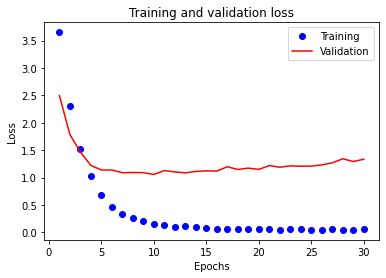

In [36]:
loss_plot(history)

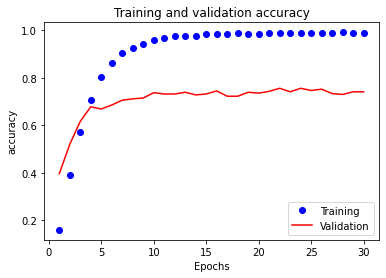

In [37]:
acc_plot(history)